In [1]:
import time
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kausar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
%%time
# basic imports
import pandas as pd
import numpy as np
import string
import warnings
warnings.filterwarnings('ignore')

#imports for visualisations
import matplotlib.pyplot as plt

# importing libraries for NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#importing libraries for modelling
import sklearn.metrics as metrics
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial.distance import correlation


CPU times: user 600 ms, sys: 208 ms, total: 808 ms
Wall time: 1.21 s


In [4]:
## Importing data
review = pd.read_csv('IL_review.csv', index_col=0)
business = pd.read_csv('business.csv', index_col=0)
users = pd.read_csv('IL_users.csv', index_col=0)



In [5]:
review['categories'] = business['category']

In [6]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Alcohol,RestaurantsDelivery,Smoking,BusinessAcceptsBitcoin,GoodForDancing,DriveThru,Caters,Music,DietaryRestrictions,ByAppointmentOnly
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820.0,40.110446,-88.233073,4.5,5,...,'none',True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,-LfTBo0oa_uD454ScEW2XA,Merry Ann's Diner,1 E Main St,Champaign,IL,61820.0,40.118133,-88.242900,3.0,47,...,u'none',True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
2,R32Yh0XxxanldkIp11fuRg,BoBo's BBQ,1511 W Springfield Ave,Champaign,IL,61821.0,40.112515,-88.271575,3.5,45,...,u'none',True,NaN,False,NaN,NaN,True,NaN,NaN,NaN
3,uJIIgBmcIn-Ye-anrqK0DQ,Dunkin',1302 N. Prospect Ave,Champaign,IL,61820.0,40.128653,-88.257411,2.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4Vig7oCo9P-j2OnPUfaXCA,Papa John's Pizza,1307 E Florida Ave,Urbana,IL,61801.0,40.098003,-88.192751,2.0,5,...,u'none',True,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [7]:
# Let us look at the word count in the review text
review['word_count'] = review['text'].apply(lambda x: len(str(x).split(" ")))
review[['text','word_count']].head()

,text,word_count
0,The building is lovely. The remodel after But...,535
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,102
2,The bread company is perfect for lunch. The pr...,33
3,This is the best restaurant under $30 per plat...,143
4,"If you want REAL, AUTHENTIC asian food, this i...",134


In [8]:
# Let us look at the character count in the review text
review['char_count'] = review['text'].str.len() ## this also includes spaces
review[['text','char_count']].head()

,text,char_count
0,The building is lovely. The remodel after But...,2961
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,569
2,The bread company is perfect for lunch. The pr...,188
3,This is the best restaurant under $30 per plat...,822
4,"If you want REAL, AUTHENTIC asian food, this i...",701


In [9]:
# Let us look at the average word length in the review text sentence
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

review['avg_word'] = review['text'].apply(lambda x: avg_word(x))
review[['text','avg_word']].head()
review['text'][1]

"LOVE LOVE LOVE this place! I'm a bit of a sucker for Irish fare in general, but the atmosphere here takes it a step further. Small and intimate with dark woods and nice artistic accents. I've had just about everything on the menu and the only thing I was unimpressed with was the roasted chicken. Definitely try the fisherman's stew! It's sooo goooood. The corned beef and cabbage is amazing, the shepherd's pie is so savory and the bangers and mash are just wonderful. They do a great snakebite too (which down in Chambana is Guinness and cider, not Guinness and Harp)"

In [10]:
# Let us look if there is any text that starts with hashtags
review['hashtags'] = review['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
review[['text','hashtags']].head()

,text,hashtags
0,The building is lovely. The remodel after But...,0
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,0
2,The bread company is perfect for lunch. The pr...,0
3,This is the best restaurant under $30 per plat...,0
4,"If you want REAL, AUTHENTIC asian food, this i...",0


In [11]:
# Let us look at the count of stopwords present in the review text
stop = stopwords.words('english')

review['stopwords'] = review['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
review[['text','stopwords']].head()

,text,stopwords
0,The building is lovely. The remodel after But...,225
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,46
2,The bread company is perfect for lunch. The pr...,12
3,This is the best restaurant under $30 per plat...,59
4,"If you want REAL, AUTHENTIC asian food, this i...",59


In [12]:
# Let us look at the count of numerics present in the review text
review['numerics'] = review['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
review[['text','numerics']].head()

,text,numerics
0,The building is lovely. The remodel after But...,4
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,0
2,The bread company is perfect for lunch. The pr...,0
3,This is the best restaurant under $30 per plat...,0
4,"If you want REAL, AUTHENTIC asian food, this i...",0


In [13]:
# Let us include the text length column in review dataset
review['text length'] = review['text'].apply(len)
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,categories,word_count,char_count,avg_word,hashtags,stopwords,numerics,text length
0,m4AXzV9l14iFBd9DRdM82w,6X0i-oGUbh5DZdTHzFuKfg,9A1C1f0m4nQltQrOOTl-Kw,1.0,11,1,0,The building is lovely. The remodel after But...,2013-12-07 02:26:13,2013,"Ethnic Food, Food Trucks, Specialty Food, Impo...",535,2961,4.506542,0,225,4,2961
1,A-yKlSLEQQcoHR5q2lCyHg,Yximlvn0cfb3yVDaLuXDxw,VHsNB3pdGVcRgs6C3jt6Zg,5.0,1,0,0,LOVE LOVE LOVE this place! I'm a bit of a suck...,2013-08-03 19:59:56,2013,"Restaurants, Diners, Sandwiches, Breakfast & B...",102,569,4.588235,0,46,0,569
2,asLnux3k2yqoVjcJcLuF0g,Cz8l7JQ2I_RhtK0BosH-7Q,Ah4i15g8Ow_zphzcpulTxQ,4.0,0,0,0,The bread company is perfect for lunch. The pr...,2015-12-05 05:38:55,2015,"Hot Dogs, Restaurants, Barbeque",33,188,4.727273,0,12,0,188
3,YIMS3PGxfWN5iFIIcYJHEg,m7rosN4Yh__tXkWP0_myqw,9MnbQg7kfb_WgxoV0hXKSQ,5.0,1,0,0,This is the best restaurant under $30 per plat...,2015-06-21 01:54:38,2015,"Donuts, Food, Coffee & Tea",143,822,4.727273,0,59,0,822
4,CWjzk0w-OZwzOmCut-6bvQ,iYwDTxhYStsIDHB514ltjA,t_yiQnxUDdPPCN2z4QyezA,5.0,1,0,1,"If you want REAL, AUTHENTIC asian food, this i...",2015-09-23 23:23:51,2015,"Pizza, Restaurants",134,701,4.208955,0,59,0,701


In [16]:
# separating our features and target
X = review['text']
y = review['stars']

In [17]:
review[['text', 'categories']]

,text,categories
0,The building is lovely. The remodel after But...,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
1,LOVE LOVE LOVE this place! I'm a bit of a suck...,"Restaurants, Diners, Sandwiches, Breakfast & B..."
2,The bread company is perfect for lunch. The pr...,"Hot Dogs, Restaurants, Barbeque"
3,This is the best restaurant under $30 per plat...,"Donuts, Food, Coffee & Tea"
4,"If you want REAL, AUTHENTIC asian food, this i...","Pizza, Restaurants"
...,...,...
35384,Decided to finally use a pizza coupon I got ov...,NaN
35385,Have always loved The Ribeye. The best salad ...,NaN
35386,The appetizers and my seared tuna were awesome!,NaN
35387,Bakery is super overpriced. smaller items are ...,NaN


In [18]:
# creating a bag of words which consist of entire text without punctuations and fiting it
bow_transformer = CountVectorizer().fit(X)

In [19]:
# Looking for the count of features
len(bow_transformer.vocabulary_)

34891

In [20]:
# Let us now transform our review text
#%%time
X = bow_transformer.transform(X)

In [21]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (35389, 34891)
Amount of Non-Zero occurrences:  2351890
Density: 0.19047382270858168


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (24772, 34891)
Number transactions y_train dataset:  (24772,)
Number transactions X_test dataset:  (10617, 34891)
Number transactions y_test dataset:  (10617,)


In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train==5)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res==5)))

Before OverSampling, counts of label '1': 3412
Before OverSampling, counts of label '2': 2655
Before OverSampling, counts of label '3': 3381
Before OverSampling, counts of label '4': 6243
Before OverSampling, counts of label '5': 9081 

After OverSampling, the shape of train_X: (45405, 34891)
After OverSampling, the shape of train_y: (45405,) 

After OverSampling, counts of label '1': 9081
After OverSampling, counts of label '2': 9081
After OverSampling, counts of label '3': 9081
After OverSampling, counts of label '4': 9081
After OverSampling, counts of label '5': 9081


In [24]:
# Let us now train the model using Multinomial Naive Bais Algorithm
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:

# Let us now predict on the test set
preds = nb.predict(X_test)

In [26]:
# Let us now evaluate our model using confusion matrix and classification report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(metrics.accuracy_score(y_test, preds))

[[1051  213  100   54   57]
 [ 341  275  258  192   64]
 [ 149  131  371  631  181]
 [  87   48  161 1289 1158]
 [  76   39   48  657 2986]]


              precision    recall  f1-score   support

         1.0       0.62      0.71      0.66      1475
         2.0       0.39      0.24      0.30      1130
         3.0       0.40      0.25      0.31      1463
         4.0       0.46      0.47      0.46      2743
         5.0       0.67      0.78      0.72      3806

    accuracy                           0.56     10617
   macro avg       0.51      0.49      0.49     10617
weighted avg       0.54      0.56      0.55     10617

0.5624941132146557


In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


result = precision_recall_fscore_support(y_test, preds, average='macro')
precision = result[0]
recall = result[1]
print('Precision is ', precision)
print('Recall is ', recall)

Precision is  0.5060092442062208
Recall is  0.4927935744759596


In [29]:
X_test.shape[0]

10617

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=2)
roc_auc = auc(fpr, tpr)

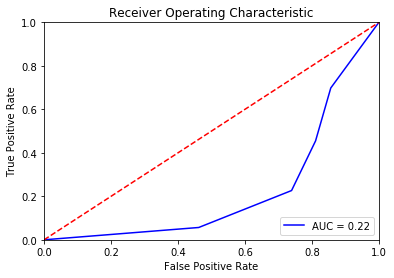

In [31]:
# Evaluating the model 

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [32]:
# adding predicted ratings to reviews

def predict_review(value,bow_transformer,nb,review):
    review_verdict = review['text'][value]
    review_verdict_transformed = bow_transformer.transform([review_verdict])
    predicted_rating = nb.predict(review_verdict_transformed)[0]
    check_df = pd.DataFrame(columns=review.columns)
    check_df.loc[0] = review.iloc[value]
    check_df['Predicted'] = predicted_rating
    return check_df

In [33]:
new_df = pd.DataFrame()
for i in range(0, len(review)):
    row_df = predict_review(i, bow_transformer,nb,review)
    new_df = pd.concat([row_df, new_df], ignore_index=True)

In [34]:
business_new = pd.merge(business, review, on='business_id', how='inner')
sim_df = business_new[['name', 'business_id', 'categories', 'text']]
sim_df.head(5)

,name,business_id,categories,text
0,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,"American (New), Restaurants, Local Flavor",I love the empanadas from the Empanadas House!...
1,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,NaN,I ordered feta cheese and spinach empanadas an...
2,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,NaN,I went to the place on Green St today. I went ...
3,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,NaN,These empanadas are excellent- we are Argentin...
4,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,NaN,These empanadas are HUGE and in my opinion bet...


In [35]:
# Computing the vectorisation of review text by fitting and transforming it
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(sim_df['text'])

In [36]:
# Let us now compute the cosine similarity for the computed matrix consisting of businesses
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [37]:
# function that returns top 10 most similar businesses based on cosine similarity scores
sim_df_pred = sim_df.reset_index()
name_x = sim_df['name']
indices = pd.Series(sim_df.index, index=sim_df['name'])

In [38]:
new_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,categories,word_count,char_count,avg_word,hashtags,stopwords,numerics,text length,Predicted
0,flX4YICNgGSs2QriJ2CgRw,x4XrrBXlKABQCyv1AMHHrA,l4x5FFzfiCFrGN0S-uZbBQ,4.0,0,0,0,"Came to dinner on a Tuesday night and, granted...",2019-10-23 15:04:57,2019,NaN,159,865,4.368750,0,70,2,865,4.0
1,PJaQsm03aJVWH9xg03WN9g,Kb0rYUpYzjJqoM7cAWZBAQ,k0SB_IQ41iHessjK4hM2LA,1.0,0,0,0,Bakery is super overpriced. smaller items are ...,2019-12-08 01:12:09,2019,NaN,57,319,4.614035,0,24,1,319,4.0
2,fGgMD8npNcGyx_Fr91m_Dg,Nl9ouJ9EqcNCX7gdPw9ZCw,dn9lwYUxmhs_mLKPu7L25Q,4.0,0,0,0,The appetizers and my seared tuna were awesome!,2014-02-17 12:39:26,2014,NaN,8,47,5.000000,0,3,0,47,5.0
3,ZnE93UGlk29kX0dfwMOGNw,ViqyzZgObMSOwWBoQbLjSg,PBmfdx-tC2D54FI3HtcKww,5.0,0,0,0,Have always loved The Ribeye. The best salad ...,2019-11-26 00:20:28,2019,NaN,65,321,4.145161,0,22,0,321,5.0
4,Fsn4u2RjnCS4kbO0OIqcCQ,51Dsi3GU4fcfxYYuW2JscQ,ly0oNXKOoSZyr0mzOsVJhg,5.0,1,0,0,Decided to finally use a pizza coupon I got ov...,2018-06-29 03:06:51,2018,NaN,65,349,4.384615,0,26,0,349,5.0


In [40]:
## recommender function

def recommend(user_id):
    value = new_df[new_df['user_id'] == user_id]
    predicted_stars = value['Predicted']
    recommended_restaurants = new_df[new_df['Predicted'] >= predicted_stars.tolist()[0]]
    business_val = business[business['business_id'] == value.business_id.tolist()[0]]['name']
    name = business_val.tolist()[0]
    name_x = name
    idx = indices[name_x]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: np.any(x[1]), reverse=True)
    restaurent_indices = [i[0] for i in sim_scores]
    names = np.unique(sim_df['name'].iloc[restaurent_indices])
    return names


## recommend restaurants to first five users

for review in users.head(5).itertuples():
    restaurants = recommend(review.user_id)
    print('\n\nRestaurants Recommended \n')
    for r in restaurants:
        print(r)



Restaurants Recommended 

BoBo's BBQ
Dunkin'
Merry Ann's Diner
Papa John's Pizza
The Empanadas House


Restaurants Recommended 

BoBo's BBQ
Dunkin'
Merry Ann's Diner
The Empanadas House


Restaurants Recommended 

A-Ri-Rang
BoBo's BBQ
Cactus Grill
Dublin O'Neil's
Dunkin'
Merry Ann's Diner
Monical's Pizza
Papa John's Pizza
The Empanadas House


Restaurants Recommended 

The Empanadas House


Restaurants Recommended 

A-Ri-Rang
BoBo's BBQ
Cactus Grill
DESTIHL Restaurant & Brew Works
Dublin O'Neil's
Dunkin'
Gustoso Authentic Italian Pasta and Pizza
Kofusion
Merry Ann's Diner
Monical's Pizza
Papa John's Pizza
The Empanadas House
